<a href="https://colab.research.google.com/github/pdkieffaber/PSYC470/blob/master/MNE_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

#import mne
#
# add plot inline in the page
%matplotlib notebook
%pylab inline
!pip install mne
import mne
mne.set_log_level('WARNING')

Populating the interactive namespace from numpy and matplotlib
     |████████████████████████████████| 7.0MB 7.5MB/s 


In [2]:
from mne.datasets import sample
data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'
event_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw-eve.fif'
print(raw_fname)

/root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif


In [3]:
raw = mne.io.read_raw_fif(raw_fname, preload=True)

In [4]:
raw.set_eeg_reference('average', projection=True)  # set EEG average reference

<ipython-input-4-96f305d9630f>:1: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  raw.set_eeg_reference('average', projection=True)  # set EEG average reference


<Raw | sample_audvis_filt-0-40_raw.fif, 376 x 41700 (277.7 s), ~122.9 MB, data loaded>

In [5]:
raw.pick_types(meg=False, eeg=True, eog=True)

<Raw | sample_audvis_filt-0-40_raw.fif, 60 x 41700 (277.7 s), ~22.0 MB, data loaded>

In [6]:
start, stop = raw.time_as_index([100, 115])  # 100 s to 115 s data segment
data, times = raw[:, start:stop]
print(data.shape)
print(times.shape)

(60, 2252)
(2252,)


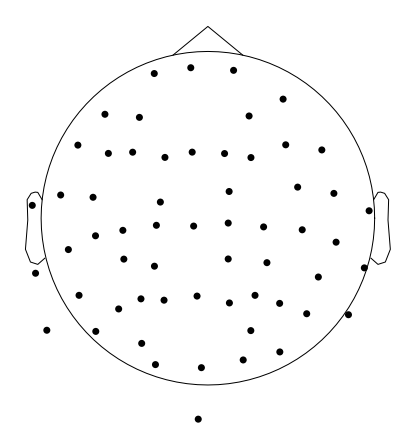

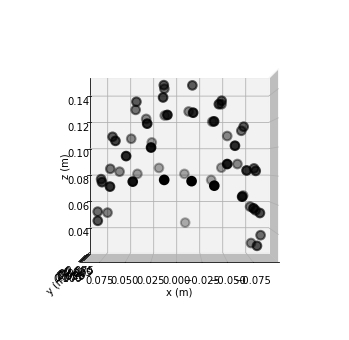

In [7]:
z=raw.plot_sensors()
x=raw.plot_sensors('3d')  # in 3D

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


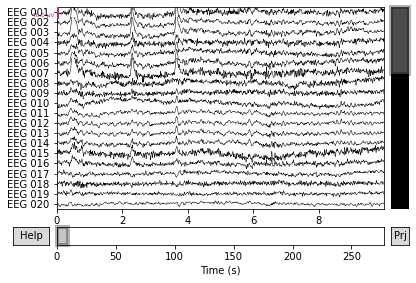

In [15]:
from matplotlib import interactive
interactive(True)
%matplotlib inline
x=raw.plot(block=False, lowpass=40)

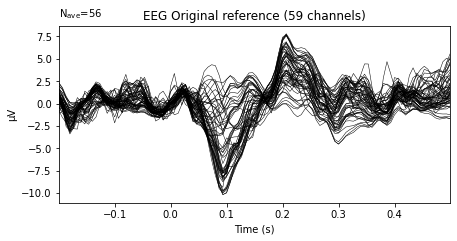

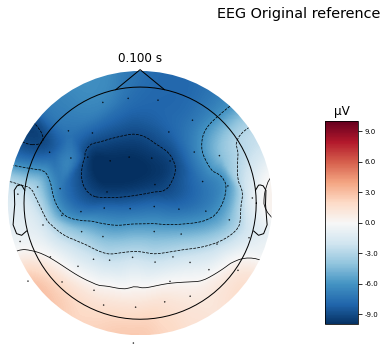

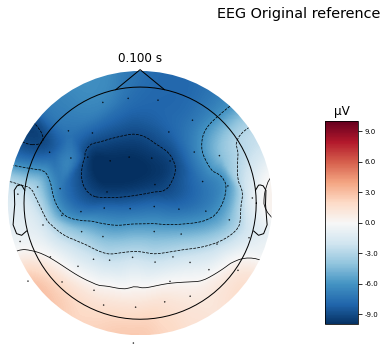

In [12]:
raw_no_ref, _ = mne.set_eeg_reference(raw, [])
reject = dict(eeg=180e-6, eog=150e-6)
event_id, tmin, tmax = {'left/auditory': 1}, -0.2, 0.5
events = mne.read_events(event_fname)
epochs_params = dict(events=events, event_id=event_id, tmin=tmin, tmax=tmax,
                     reject=reject)

evoked_no_ref = mne.Epochs(raw_no_ref, **epochs_params).average()
del raw_no_ref  # save memory

title = 'EEG Original reference'
evoked_no_ref.plot(titles=dict(eeg=title))
evoked_no_ref.plot_topomap(times=[0.1], size=3., title=title)